In [1]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def one_hot(x):
    return np.eye(16)[x:x + 1]

In [3]:
env = gym.make('FrozenLake-v0')

[2017-03-20 15:25:46,293] Making new env: FrozenLake-v0


In [4]:
input_size = env.observation_space.n
output_size = env.action_space.n

learning_rate = 0.1
dis = .99
num_episodes = 2000

In [5]:
with tf.device('/cpu'):
    X = tf.placeholder(shape=[1,input_size], dtype=tf.float32)
    Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)
    W = tf.Variable(tf.random_normal([input_size, output_size], 0, 0.01))

    Qpred = tf.matmul(X, W)
    
    loss = tf.reduce_sum(tf.square(Y - Qpred))
    
    train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    
    init = tf.global_variables_initializer()


Percent of successful episods: 0.4885%


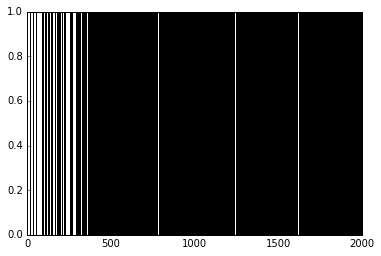

In [6]:
rList = []
with tf.device('/cpu'):
    sess = tf.Session(config=tf.ConfigProto(log_device_placement=True)) 
    sess.run(init)
    
    for i in range(num_episodes):
        s = env.reset()
        e = 1./((i/50) + 10)
        rAll = 0
        done = False
        local_loss = []

        while not done:
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)

            s1, reward, done, _ = env.step(a)
            
            # Update
            if done:
                Qs[0,a] = reward
            else:
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                Qs[0,a] = reward + dis * np.max(Qs1)

            sess.run(train, feed_dict={X:one_hot(s), Y: Qs})

            rAll += reward
            s = s1
        rList.append(rAll)

    print("Percent of successful episods: " + str(sum(rList)/num_episodes) + "%")
    plt.bar(range(len(rList)), rList)
    plt.show
    

In [32]:
one_hot(s)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])